In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
pip install tensorflow


  Using cached tensorflow-2.20.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.5 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.2.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-2.0.0-cp312-cp312-manylinux1_x86_64.manylinux_2_28_x86_64.manylinux_2_5_x86_64.whl.metadata (8.8 kB)
  Using cached grpcio-1.76.0-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (3.7 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached markdown-3.10-py3-none-any.whl.metadata (5.1 kB)
  Using cached tensorboard_d

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

2025-11-06 20:58:29.650361: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-06 20:58:29.783805: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-06 20:58:32.068769: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [4]:
df = pd.read_csv('./Datasets/churn_modelling.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [5]:
df.shape

(10000, 14)

In [6]:
df.describe()


RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1)

In [10]:
def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['yellow','blue'], label=['exited','not_exited'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel('No. of customers',fontsize=20)
    plt.legend()

In [11]:
df_churn_exited = df[df['Exited']==1]['Tenure']
df_churn_not_exited = df[df['Exited']==0]['Tenure']

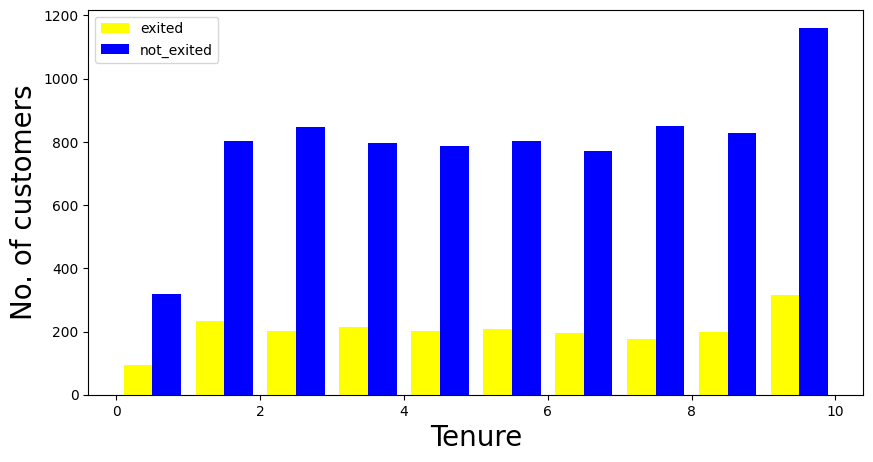

In [12]:
visualization(df_churn_exited, df_churn_not_exited, 'Tenure')

In [13]:
states = pd.get_dummies(df['Geography'], drop_first=True)
gender = pd.get_dummies(df['Gender'], drop_first=True)
df = pd.concat([df, gender, states], axis=1)

In [27]:
x = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','IsActiveMember','EstimatedSalary','Male','Germany','Spain']]
y = df['Exited']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [29]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [30]:
print('Training Data:\n',x_train)

Training Data:
 [[-0.25721618 -0.37464131 -0.698909   ... -1.09160857 -0.57141165
  -0.568992  ]
 [-0.47453699  0.76462199  0.68781521 ...  0.91607929 -0.57141165
   1.75749397]
 [-1.79915906  0.8595606  -1.04559005 ... -1.09160857 -0.57141165
   1.75749397]
 ...
 [ 1.36751558  0.00511312  1.38117731 ...  0.91607929 -0.57141165
   1.75749397]
 [-0.03989537 -0.84933436  0.34113415 ...  0.91607929  1.75005182
  -0.568992  ]
 [-0.26756479 -1.03921157 -0.698909   ... -1.09160857 -0.57141165
  -0.568992  ]]


In [31]:

print('Testing Data:\n',x_test)

Testing Data:
 [[ 0.89147952  0.57474477  1.72785836 ...  0.91607929 -0.57141165
  -0.568992  ]
 [-0.00884954 -0.37464131 -0.698909   ... -1.09160857  1.75005182
  -0.568992  ]
 [ 1.67797388 -0.94427296  0.34113415 ...  0.91607929 -0.57141165
  -0.568992  ]
 ...
 [ 0.98461701 -1.41896601  1.72785836 ...  0.91607929 -0.57141165
   1.75749397]
 [ 1.97808357 -0.1847641  -0.35222795 ... -1.09160857 -0.57141165
  -0.568992  ]
 [-0.23651896 -1.03921157 -0.698909   ... -1.09160857  1.75005182
  -0.568992  ]]


In [32]:
classifier = Sequential()
classifier.add(Input(shape=(10,)))
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 6)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115 (460.00 B)

 Trainable params: 115 (460.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [36]:
classifier.fit(x_train, y_train, batch_size=10, epochs=50)


Epoch 1/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7254 - loss: 0.5501
Epoch 2/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7994 - loss: 0.4464
Epoch 3/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8159 - loss: 0.4250
Epoch 4/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8289 - loss: 0.4058
Epoch 5/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8424 - loss: 0.3824
Epoch 6/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8506 - loss: 0.3650
Epoch 7/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8530 - loss: 0.3567
Epoch 8/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8539 - loss: 0.3528
Epoch 9/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8551 - loss: 0.3503
Epoch 10/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8563 - loss: 0.3492
Epoch 11/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8556 - loss: 0.3474
Epoch 12/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [37]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [38]:
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [39]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[2263  142]
 [ 290  305]]


In [40]:
print('Accuracy Score:', acc)

Accuracy Score: 0.856


<Axes: >

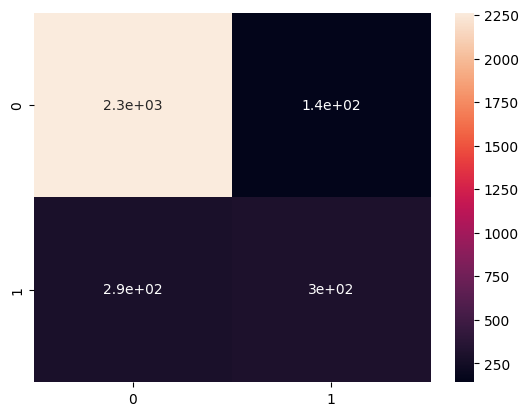

In [41]:
sns.heatmap(cm, annot=True)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2405
           1       0.68      0.51      0.59       595

    accuracy                           0.86      3000
   macro avg       0.78      0.73      0.75      3000
weighted avg       0.85      0.86      0.85      3000

